# Step 6 : Pre-processing for ML : Stage 2

1. Split the data into features(X) and the target label(y)


2. Train | Test Split
   - We seperate the training data and test data(hold-out)


3. Feature Selection : 
   - Since the input variables are mostly categorical and the output variable(FINDJOB) is also categorical, Chi-Squared test was adopted to select top 10 features for ML models.


4. Imbalanced Data Check : Check whether our data needs to be resampled
   - Our target label FINDJOB is slightly imbalanced (4:6). This is often not a concern, so we didn't resample the data. 


5. Scale the data with MinMaxScaler
   We chose MinMax Scaler to normalize our data because :
      - Our data are mostly categorical data within the bounded intervals with little outliers(standardization will be better for data with a lot of outliers). Normalization will be useful for this data. 
      - It doesn't distort the shape of the data
  

## Split Data into Features(Xs) and Target(y) 

### Import Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("Findjob_encoded.csv")

In [3]:
df

,FINDJOB,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,...,F_RACETHN_Mixed race,F_RACETHN_White,F_MARITAL_Married/Live with a partner,F_MARITAL_Never Married,Branch_Army,Branch_Coast_Guard,Branch_Marines,Branch_Muti-Branch,Branch_Navy,p_income
0,1,4,0,2,3,3,0,2,4,3,...,0,1,1,0,0,0,0,1,0,31500
1,0,4,2,2,2,3,0,3,3,2,...,0,1,1,0,1,0,0,0,0,75000
2,1,4,1,2,2,2,1,3,4,2,...,0,1,1,0,0,0,0,0,1,31500
3,1,4,3,2,1,2,2,2,4,2,...,0,1,1,0,0,0,0,0,0,62500
4,1,4,0,2,2,2,0,2,4,2,...,0,0,1,0,0,0,1,0,0,44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,2,1,1,2,2,1,1,2,1,...,0,1,0,0,0,0,0,0,1,63000
237,1,1,0,3,2,3,3,0,2,1,...,0,1,0,0,0,0,0,0,1,25000
238,1,4,0,2,1,3,0,1,3,2,...,0,1,1,0,0,0,0,0,1,31500
239,1,4,3,2,1,3,2,1,2,2,...,0,1,1,0,0,0,1,0,0,62500


In [4]:
len(df.columns)

35

In [5]:
# Split data into X and y
X = df.drop('FINDJOB',axis=1)
y = df['FINDJOB']

## Train | Test Split 

In [6]:
len(df)

241

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# help(train_test_split)
# Split the training data and other(validation + test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
# 168 rows
X_train

,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,F_EDUCCAT2,...,F_RACETHN_Mixed race,F_RACETHN_White,F_MARITAL_Married/Live with a partner,F_MARITAL_Never Married,Branch_Army,Branch_Coast_Guard,Branch_Marines,Branch_Muti-Branch,Branch_Navy,p_income
169,2,0,2,1,2,3,3,4,1,1,...,0,1,0,0,1,0,0,0,0,63000
141,4,1,2,3,2,0,1,2,3,1,...,0,1,1,0,0,0,0,0,0,44000
237,1,0,3,2,3,3,0,2,1,0,...,0,1,0,0,0,0,0,0,1,25000
16,2,1,1,1,1,3,1,0,1,0,...,0,0,0,0,1,0,0,0,0,63000
176,2,3,1,1,2,2,3,3,3,4,...,0,1,1,0,1,0,0,0,0,31500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4,2,2,2,3,1,2,3,2,2,...,0,1,1,0,0,0,0,1,0,75000
70,2,1,1,2,2,2,2,4,1,4,...,0,1,1,0,0,0,1,0,0,75000
81,0,0,1,0,0,3,3,0,1,0,...,0,1,0,0,0,0,0,0,1,10000
11,4,3,2,3,3,0,3,4,3,4,...,0,1,1,0,0,0,0,0,0,62500


In [10]:
# Check the number of rows 
print(f'Total X: {len(df)} rows')
print(f'X_train: {len(X_train)} rows')
print(f'X_test: {len(X_test)} rows')

Total X: 241 rows
X_train: 168 rows
X_test: 73 rows


## Feature Selection
Feature Selection should be conducted after train_test_split. Then, after feature selection, we can do feature scaling. 

In [11]:
# We have 35 features currently
len(df.columns)

35

### Base Model : Tree Method 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [13]:
# Remember to specify random_state
# Otherwise classification will change for every iteration
base_model = DecisionTreeClassifier(random_state=101)

In [14]:
# Create a function to show cross validation score on accuracy
def cv_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold)
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [15]:
# This is just the base model(unscaled data)
cv_score(base_model,X_train,y_train)

Results :[0.47058824 0.47058824 0.58823529 0.41176471 0.82352941 0.64705882
 0.47058824 0.47058824 0.4375     0.375     ]
cv_score: 0.5165441176470589


### Feature Selection : Chi-Squared Test
For categorical input and categorical output

How to perform feature seleciton with categorical data : 
https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
topfeatures = SelectKBest(score_func=chi2,k=10)
selected_feature = topfeatures.fit(X_train,y_train)

In [18]:
# Visualize top features
dfscores = pd.DataFrame(selected_feature.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Chi-Score']

In [19]:
featureScores

,Features,Chi-Score
0,YEARSERV,3.821176
1,RANK,0.702961
2,MILTOCIV,8.561126
3,CIVADJ,6.035170
4,CIVADJISSc,1.349271
5,CIVADJISSe,2.428316
6,MILJOBSKILLS,2.846510
7,MILHELPJOB,5.906058
8,F_AGECAT,0.523730
9,F_EDUCCAT2,0.007993


In [20]:
# Visualize top 10 features
# Although p_income is numeric(should not be evaluated by chi-square test)
# We will get rid of it later (it should not predict FINDJOB anyway)
print(featureScores.nlargest(11,'Chi-Score'))

           Features     Chi-Score
33         p_income  46312.909726
2          MILTOCIV      8.561126
3            CIVADJ      6.035170
7        MILHELPJOB      5.906058
15  CIVADJPROBb_Yes      5.742024
14  CIVADJPROBa_Yes      5.481107
0          YEARSERV      3.821176
20       F_HISP_Yes      3.181176
6      MILJOBSKILLS      2.846510
5        CIVADJISSe      2.428316
23  F_RACETHN_Black      2.393665


In [21]:
# Extract only features name
uni_features = featureScores.nlargest(11,'Chi-Score')['Features']
uni_features = uni_features[1:11]
uni_features

2            MILTOCIV
3              CIVADJ
7          MILHELPJOB
15    CIVADJPROBb_Yes
14    CIVADJPROBa_Yes
0            YEARSERV
20         F_HISP_Yes
6        MILJOBSKILLS
5          CIVADJISSe
23    F_RACETHN_Black
Name: Features, dtype: object

In [22]:
# Create a list of top 10 features
uni_features = list(uni_features)
uni_features

['MILTOCIV',
 'CIVADJ',
 'MILHELPJOB',
 'CIVADJPROBb_Yes',
 'CIVADJPROBa_Yes',
 'YEARSERV',
 'F_HISP_Yes',
 'MILJOBSKILLS',
 'CIVADJISSe',
 'F_RACETHN_Black']

In [23]:
selected_columns = uni_features + ["FINDJOB"] 
selected_columns

['MILTOCIV',
 'CIVADJ',
 'MILHELPJOB',
 'CIVADJPROBb_Yes',
 'CIVADJPROBa_Yes',
 'YEARSERV',
 'F_HISP_Yes',
 'MILJOBSKILLS',
 'CIVADJISSe',
 'F_RACETHN_Black',
 'FINDJOB']

In [24]:
df[selected_columns]

,MILTOCIV,CIVADJ,MILHELPJOB,CIVADJPROBb_Yes,CIVADJPROBa_Yes,YEARSERV,F_HISP_Yes,MILJOBSKILLS,CIVADJISSe,F_RACETHN_Black,FINDJOB
0,2,3,4,0,1,4,0,2,0,0,1
1,2,2,3,0,0,4,0,3,0,0,0
2,2,2,4,0,0,4,0,3,1,0,1
3,2,1,4,0,0,4,0,2,2,0,1
4,2,2,4,0,0,4,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
236,1,2,2,1,1,2,0,1,1,0,0
237,3,2,2,0,0,1,0,0,3,0,1
238,2,1,3,0,1,4,0,1,0,0,1
239,2,1,2,0,0,4,0,1,2,0,1


In [25]:
X_train =X_train[uni_features]
X_train

,MILTOCIV,CIVADJ,MILHELPJOB,CIVADJPROBb_Yes,CIVADJPROBa_Yes,YEARSERV,F_HISP_Yes,MILJOBSKILLS,CIVADJISSe,F_RACETHN_Black
169,2,1,4,0,1,2,0,3,3,0
141,2,3,2,0,0,4,0,1,0,0
237,3,2,2,0,0,1,0,0,3,0
16,1,1,0,0,1,2,1,1,3,0
176,1,1,3,0,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...
63,2,2,3,0,0,4,0,2,1,0
70,1,2,4,0,0,2,0,2,2,0
81,1,0,0,1,1,0,0,3,3,0
11,2,3,4,0,0,4,0,3,0,0


In [26]:
X_test =X_test[uni_features]
print(len(X_test))
print(len(X_test.columns))

73
10


In [27]:
# The performance increased slightly from 0.51 to 0.57
cv_score(base_model,X_train,y_train)

Results :[0.47058824 0.47058824 0.64705882 0.52941176 0.52941176 0.58823529
 0.70588235 0.82352941 0.5        0.4375    ]
cv_score: 0.5702205882352941


## Imbalanced Data Check
if we need to do SMOTE : 
- install code : sudo pip install imbalanced-learn

In [28]:
# 1 represent findjob within 6 months
df['FINDJOB'].value_counts()

1    144
0     97
Name: FINDJOB, dtype: int64

In [29]:
# Percentage
(df['FINDJOB'].value_counts()/len(df))*100

1    59.751037
0    40.248963
Name: FINDJOB, dtype: float64

<AxesSubplot:xlabel='FINDJOB', ylabel='count'>

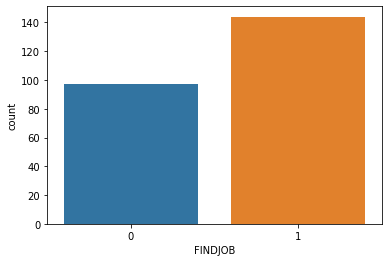

In [30]:
# The label is slightly imbalance
# This is often not a concern, so we don't resample the data
sns.countplot(x='FINDJOB',data=df)

In [31]:
# These are codes for oversampling (not necessary in this data)
# Remember sampling should be applied after feature selection
# from imblearn.over_sampling import SMOTE
# from collections import Counter

In [32]:
#oversample = SMOTE()
#X,y = oversample.fit_resample(X,y)

In [33]:
#counter = Counter(y)
#for k,v in counter.items():
    #dist = v/ len(y)*100
    #print(f"Class = {k},n={v}({dist}%)")

## Scale the Data

In [34]:
features = X_train.columns
features

Index(['MILTOCIV', 'CIVADJ', 'MILHELPJOB', 'CIVADJPROBb_Yes',
       'CIVADJPROBa_Yes', 'YEARSERV', 'F_HISP_Yes', 'MILJOBSKILLS',
       'CIVADJISSe', 'F_RACETHN_Black'],
      dtype='object')

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Scale the data
scaler = MinMaxScaler()
# Only fit training data
scaler.fit(X_train)
# Scle to all X data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[0.66666667, 0.33333333, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.66666667, 1.        , 0.5       , ..., 0.33333333, 0.        ,
        0.        ],
       [1.        , 0.66666667, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.66666667, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 1.        , ..., 1.        , 0.33333333,
        0.        ]])

In [38]:
# 10 features, 168 rows
X_train.shape

(168, 10)

# Step 7 : Model Selection with K-Fold Cross-Validation

1. Select the best basic model - Logistic Model
2. Tuning the parameters
3. Model evaluation on test data set

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
# Create a function to show cross validation score on accuracy
def Accuracy_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold)
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [41]:
# Create a function to show cross validation score on accuracy
def Precision_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='precision')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [42]:
# Create a function to show cross validation score on accuracy
def Recall_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='recall')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [43]:
# Create a function to show cross validation score on f1
def f1_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='f1')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

## Basic Models
### Model 1 : Logistic Regression Model 
- Accuracy : 66.1
- Precision : 68
- Recall : 80
- F1 score: 73

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression(solver='saga',multi_class ='ovr',max_iter=20000,random_state=101)

In [46]:
Accuracy_score(log_model,X_train,y_train)

Results :[0.29411765 0.64705882 0.64705882 0.76470588 0.76470588 0.70588235
 0.76470588 0.64705882 0.625      0.75      ]
cv_score: 0.6610294117647058


In [47]:
Precision_score(log_model,X_train,y_train)

Results :[0.25       0.6        0.61538462 0.8        0.76923077 0.83333333
 0.72727273 0.77777778 0.69230769 0.72727273]
cv_score: 0.6792579642579643


In [48]:
Recall_score(log_model,X_train,y_train)

Results :[0.5        0.75       0.88888889 0.92307692 0.90909091 0.76923077
 0.88888889 0.63636364 0.81818182 0.88888889]
cv_score: 0.7972610722610722


In [49]:
f1_score(log_model,X_train,y_train)

Results :[0.33333333 0.66666667 0.72727273 0.85714286 0.83333333 0.8
 0.8        0.7        0.75       0.8       ]
cv_score: 0.7267748917748917


### Model 2 : K Nearest Neighbors 
- Accuracy : 60.1
- Precision : 65.2
- Recall : 72.7
- F1 score: 76.2

Require scaling of data because KNN uses the Euclidean distance btw two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also is not suitable for large dimensional data 

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn



In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# help(KNeighborsClassifier)

In [52]:
knn_model = KNeighborsClassifier()

In [53]:
Accuracy_score(knn_model,X_train,y_train)

Results :[0.47058824 0.58823529 0.52941176 0.58823529 0.76470588 0.52941176
 0.64705882 0.70588235 0.5        0.6875    ]
cv_score: 0.6011029411764707


In [54]:
Precision_score(knn_model,X_train,y_train)

Results :[0.38461538 0.55555556 0.54545455 0.75       0.81818182 0.69230769
 0.63636364 0.8        0.66666667 0.66666667]
cv_score: 0.6515811965811966


In [55]:
Recall_score(knn_model,X_train,y_train)

Results :[0.83333333 0.625      0.66666667 0.69230769 0.81818182 0.69230769
 0.77777778 0.72727273 0.54545455 0.88888889]
cv_score: 0.7267191142191143


In [56]:
f1_score(knn_model,X_train,y_train)

Results :[0.52631579 0.58823529 0.6        0.72       0.81818182 0.69230769
 0.7        0.76190476 0.6        0.76190476]
cv_score: 0.6768850117890366


### Model 3 : Support Vector Machines (the best performance)
- Accuracy : 68
- Precision : 72
- Recall : 80
- F1 score: 74.4


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [57]:
# Support Vector Classifier
from sklearn.svm import SVC

In [58]:
svm_model = SVC(random_state=101)

In [59]:
Accuracy_score(svm_model,X_train,y_train)

Results :[0.52941176 0.64705882 0.52941176 0.64705882 0.76470588 0.70588235
 0.64705882 0.76470588 0.625      0.9375    ]
cv_score: 0.6797794117647059


In [60]:
Precision_score(svm_model,X_train,y_train)

Results :[0.42857143 0.6        0.54545455 0.76923077 0.76923077 0.83333333
 0.63636364 0.88888889 0.72727273 1.        ]
cv_score: 0.7198346098346098


In [61]:
Recall_score(svm_model,X_train,y_train)

Results :[1.         0.75       0.66666667 0.76923077 0.90909091 0.76923077
 0.77777778 0.72727273 0.72727273 0.88888889]
cv_score: 0.7985431235431235


In [62]:
f1_score(svm_model,X_train,y_train)

Results :[0.6        0.66666667 0.6        0.76923077 0.83333333 0.8
 0.7        0.8        0.72727273 0.94117647]
cv_score: 0.7437679967091733


### Model 4 : Decision Tree 
- Accuracy : 57
- Precision : 64.4
- Recall : 67
- F1 score: 63

In [63]:
Accuracy_score(base_model,X_train,y_train)

Results :[0.47058824 0.47058824 0.64705882 0.52941176 0.52941176 0.58823529
 0.70588235 0.82352941 0.5        0.4375    ]
cv_score: 0.5702205882352941


In [64]:
Precision_score(base_model,X_train,y_train)

Results :[0.38461538 0.4        0.6        0.85714286 0.63636364 0.75
 0.7        0.9        0.71428571 0.5       ]
cv_score: 0.6442407592407593


In [65]:
Recall_score(base_model,X_train,y_train)

Results :[0.83333333 0.25       1.         0.46153846 0.63636364 0.69230769
 0.77777778 0.81818182 0.45454545 0.77777778]
cv_score: 0.6701825951825952


In [66]:
f1_score(base_model,X_train,y_train)

Results :[0.52631579 0.30769231 0.75       0.6        0.63636364 0.72
 0.73684211 0.85714286 0.55555556 0.60869565]
cv_score: 0.6298607903665111


### Model 5 : Random Forest 
- Accuracy : 62.4
- Precision : 66.4
- Recall : 73.5
- F1 score: 69

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# help(RandomForestClassifier)

In [69]:
rf_model = RandomForestClassifier(random_state=101)

In [70]:
Accuracy_score(rf_model,X_train,y_train)

Results :[0.41176471 0.41176471 0.70588235 0.58823529 0.82352941 0.70588235
 0.70588235 0.82352941 0.4375     0.625     ]
cv_score: 0.6238970588235293


In [71]:
Precision_score(rf_model,X_train,y_train)

Results :[0.33333333 0.375      0.64285714 0.8        0.83333333 0.83333333
 0.7        0.9        0.58333333 0.63636364]
cv_score: 0.6637554112554113


In [72]:
Recall_score(rf_model,X_train,y_train)

Results :[0.66666667 0.375      1.         0.61538462 0.90909091 0.76923077
 0.77777778 0.81818182 0.63636364 0.77777778]
cv_score: 0.734547397047397


In [73]:
f1_score(rf_model,X_train,y_train)

Results :[0.44444444 0.375      0.7826087  0.69565217 0.86956522 0.8
 0.73684211 0.85714286 0.60869565 0.7       ]
cv_score: 0.6869951145980895


### Model 6 : AdaBoost 
- Accuracy : 63.1
- Precision : 69
- Recall : 71.2
- F1 score: 67.6

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ab_model = AdaBoostClassifier(random_state=101)

In [76]:
Accuracy_score(ab_model,X_train,y_train)

Results :[0.47058824 0.52941176 0.64705882 0.64705882 0.76470588 0.70588235
 0.70588235 0.64705882 0.5625     0.625     ]
cv_score: 0.6305147058823529


In [77]:
Precision_score(ab_model,X_train,y_train)

Results :[0.4        0.5        0.61538462 0.76923077 0.81818182 0.83333333
 0.7        0.85714286 0.7        0.66666667]
cv_score: 0.685994005994006


In [78]:
Recall_score(ab_model,X_train,y_train)

Results :[1.         0.25       0.88888889 0.76923077 0.81818182 0.76923077
 0.77777778 0.54545455 0.63636364 0.66666667]
cv_score: 0.7121794871794872


In [79]:
f1_score(ab_model,X_train,y_train)

Results :[0.57142857 0.33333333 0.72727273 0.76923077 0.81818182 0.8
 0.73684211 0.66666667 0.66666667 0.66666667]
cv_score: 0.6756289324710378


### Model 7 : Gradient Boosting
- Accuracy : 59.5
- Precision : 65.1
- Recall : 66.3
- F1 score: 64.2

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
#help(GradientBoostingClassifier)

In [82]:
gb_model =GradientBoostingClassifier(random_state=101)

In [83]:
Accuracy_score(gb_model,X_train,y_train)

Results :[0.64705882 0.47058824 0.52941176 0.64705882 0.64705882 0.58823529
 0.64705882 0.64705882 0.5        0.625     ]
cv_score: 0.5948529411764706


In [84]:
Precision_score(gb_model,X_train,y_train)

Results :[0.5        0.4        0.53846154 0.81818182 0.69230769 0.8
 0.63636364 0.77777778 0.71428571 0.63636364]
cv_score: 0.6513741813741813


In [85]:
Recall_score(gb_model,X_train,y_train)

Results :[0.83333333 0.25       0.77777778 0.69230769 0.81818182 0.61538462
 0.77777778 0.63636364 0.45454545 0.77777778]
cv_score: 0.6633449883449882


In [86]:
f1_score(gb_model,X_train,y_train)

Results :[0.625      0.30769231 0.63636364 0.75       0.75       0.69565217
 0.7        0.7        0.55555556 0.7       ]
cv_score: 0.6420263673524543


## Tuning Parameters for the Best Basic Model : SVM Model 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
Accuracy and recall score slightly improved. 

Before vs After :
- Accuracy : 68 | 68.6
- Precision : 72 | 70.2 
- Recall : 80 | 80.6
- F1 score: 74.4 | 74.3

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# Liblinear is better for small datasets
final_model = SVC()

In [89]:
# Check the parameters
final_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [90]:
# Parameters Settings

kernel = ['linear','rbf','sigmoid']
# Use logarithmically spaced C values
C = [0.01,0.1,1.0,10,100,1000]
gamma = ['scale','auto']

param_grid = {'kernel':kernel,
              'C':C,
              'gamma':gamma}

In [91]:
# Create a grid model and pass in the parameters above to do a grid search
grid_model = GridSearchCV(final_model,param_grid = param_grid)

In [92]:
# Fit the model
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [93]:
grid_model.best_estimator_

SVC(C=100, gamma='auto')

In [94]:
# Show the best parameters
grid_model.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [95]:
# Create a model and set the parameters as above
best_model = SVC(C= 100, kernel= 'linear',gamma = 'scale')

In [96]:
Accuracy_score(best_model,X_train,y_train)

Results :[0.29411765 0.70588235 0.64705882 0.76470588 0.76470588 0.70588235
 0.76470588 0.64705882 0.75       0.8125    ]
cv_score: 0.6856617647058824


In [97]:
Precision_score(best_model,X_train,y_train)

Results :[0.25       0.66666667 0.61538462 0.8        0.73333333 0.83333333
 0.72727273 0.77777778 0.81818182 0.8       ]
cv_score: 0.7021950271950271


In [98]:
Recall_score(best_model,X_train,y_train)

Results :[0.5        0.75       0.88888889 0.92307692 1.         0.76923077
 0.88888889 0.63636364 0.81818182 0.88888889]
cv_score: 0.8063519813519813


In [99]:
f1_score(best_model,X_train,y_train)

Results :[0.33333333 0.70588235 0.72727273 0.85714286 0.84615385 0.8
 0.8        0.7        0.81818182 0.84210526]
cv_score: 0.7430072198183654


## Model Evaluation on Test Data (Hold-out set)

In [100]:
def report_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
    disp.plot()
    print(classification_report(y_test,pred))

In [101]:
best_model.fit(X_train,y_train)

SVC(C=100, kernel='linear')

In [102]:
predictions = best_model.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0])

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.54      0.52      0.53        29
           1       0.69      0.70      0.70        44

    accuracy                           0.63        73
   macro avg       0.61      0.61      0.61        73
weighted avg       0.63      0.63      0.63        73



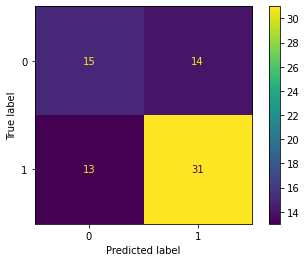

In [103]:
# This is the final test result
report_model(best_model)

### Feature Importance

In [104]:
# Check the feature names
features

Index(['MILTOCIV', 'CIVADJ', 'MILHELPJOB', 'CIVADJPROBb_Yes',
       'CIVADJPROBa_Yes', 'YEARSERV', 'F_HISP_Yes', 'MILJOBSKILLS',
       'CIVADJISSe', 'F_RACETHN_Black'],
      dtype='object')

In [105]:
# Check feature coefficients
coef = best_model.coef_
coef

array([[ 1.19878680e+00,  1.20125028e+00,  1.59969400e+00,
        -1.19957088e+00, -9.49230731e-04,  8.31813073e-04,
         7.99774923e-01,  2.02749759e-04,  7.51810771e-04,
        -3.99758185e-01]])

In [106]:
# Check data type of features and coef
type(features)

pandas.core.indexes.base.Index

In [107]:
type(coef)

numpy.ndarray

In [108]:
# Check the shape of features and coef
features.shape

(10,)

In [109]:
coef.shape

(1, 10)

In [110]:
# Reshape data
coef = coef.reshape(10,)
coef

array([ 1.19878680e+00,  1.20125028e+00,  1.59969400e+00, -1.19957088e+00,
       -9.49230731e-04,  8.31813073e-04,  7.99774923e-01,  2.02749759e-04,
        7.51810771e-04, -3.99758185e-01])

In [111]:
coef.shape

(10,)

In [112]:
# Combine feature names and its coefficient to a dataframe
fc = pd.DataFrame(np.column_stack([features,coef]),columns=['Features','coefficients'])
fc

,Features,coefficients
0,MILTOCIV,1.198787
1,CIVADJ,1.20125
2,MILHELPJOB,1.599694
3,CIVADJPROBb_Yes,-1.199571
4,CIVADJPROBa_Yes,-0.000949
5,YEARSERV,0.000832
6,F_HISP_Yes,0.799775
7,MILJOBSKILLS,0.000203
8,CIVADJISSe,0.000752
9,F_RACETHN_Black,-0.399758


In [113]:
# Seperate negative features and positive features
# We can see that CIVADJPROBb(receive food benefits) affact FINDJOB negatively the most
negative_features = fc[fc['coefficients']<0]
negative_features= negative_features.sort_values('coefficients',ascending=True)
negative_features

,Features,coefficients
3,CIVADJPROBb_Yes,-1.199571
9,F_RACETHN_Black,-0.399758
4,CIVADJPROBa_Yes,-0.000949


In [114]:
# How veterans adjust to civilian life seems to be an important factor
positive_features = fc[fc['coefficients']>0]
positive_features = positive_features.sort_values('coefficients',ascending=False)
positive_features

,Features,coefficients
2,MILHELPJOB,1.599694
1,CIVADJ,1.20125
0,MILTOCIV,1.198787
6,F_HISP_Yes,0.799775
5,YEARSERV,0.000832
8,CIVADJISSe,0.000752
7,MILJOBSKILLS,0.000203


### Precision-Recall Curve and ROC Curve

In [115]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/Users/emilychaukang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


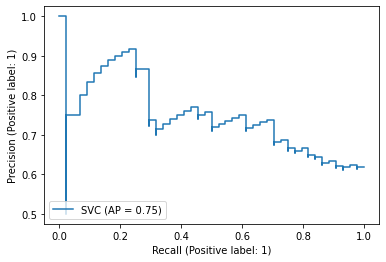

In [116]:
plot_precision_recall_curve(best_model,X_test,y_test)

/Users/emilychaukang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


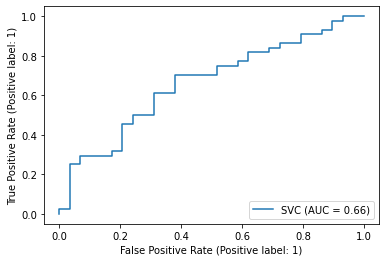

In [117]:
# AUC: 0.66
plot_roc_curve(best_model,X_test,y_test)

# Conclusion

## Potential Causes of Bad Performance
- Training sample is not large enough : increase sample size
- empirical test to check whether your features separates your classes: extract the first two or three principal components and display them on a 2D or 3D scatter plot (use a different marker for each class). That will also help you see whether there are outliers that may affect the results.
- One of the explanation is that your data does not support accuracy higher than 70%. Maybe your features doesn't fit enough to get better classification
- High dimensionality : Perform feature selection to reduce features(dimensionality)